<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Ahora, podemos analizar los datos de los clusters, para ver que características tienen y si podemos sacar alguna conclusión de ellos.</br>

A pesar de que el mejor modelo funciona con los datos crudos y con los datos categorizados procesador por OneHotEncoder, utilizando 2 clusteres, tenemos que tener en cuenta que el modelo nos retorna 1 cluster que tiene 1 solo elemento, por lo que no podemos sacar ninguna conclusión de él. Por lo tanto, vamos a utilizar el modelo que utiliza los datos crudos y con los datos categorizados procesador por OneHotEncoder pero 3 clusteres.
</div>

In [120]:
import pandas as pd
import numpy as np

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [123]:
valores_numéricos = [
    'Longitud título', 'Vistas', 'Suscriptores', 'Impresiones',
    'Longitud descripción', 'Descripción sentimiento positivo', 'Duración (segundos)', 'Cantidad de emojis en el título',
    'Cantidad de emojis en las descripción', 'Cantidad de hashtags en el título', 'Cantidad de hashtags en la descripción','Mes de publicación'
]

In [124]:
valores_categóricos = [
    'Categoría', 'Tipo de duración', 'Grupo de color familiar',
    'Temperatura', 'Celebración cercana (agrupado)', 'Países de celebración cercana',
    'Relación con festividad', 'Grupo Horario', 'Cuartiles (Mes)'
]

In [125]:
df = pd.read_csv('videos.csv')

In [126]:
# df.drop(columns=['R', 'G', 'B'], inplace=True)

In [127]:
onehot_encoder = OneHotEncoder()
valores_categóricos_normalizados = onehot_encoder.fit_transform(df[valores_categóricos])

In [128]:
df_transformado = np.hstack((df[valores_numéricos], valores_categóricos_normalizados.toarray()))
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df_transformado)

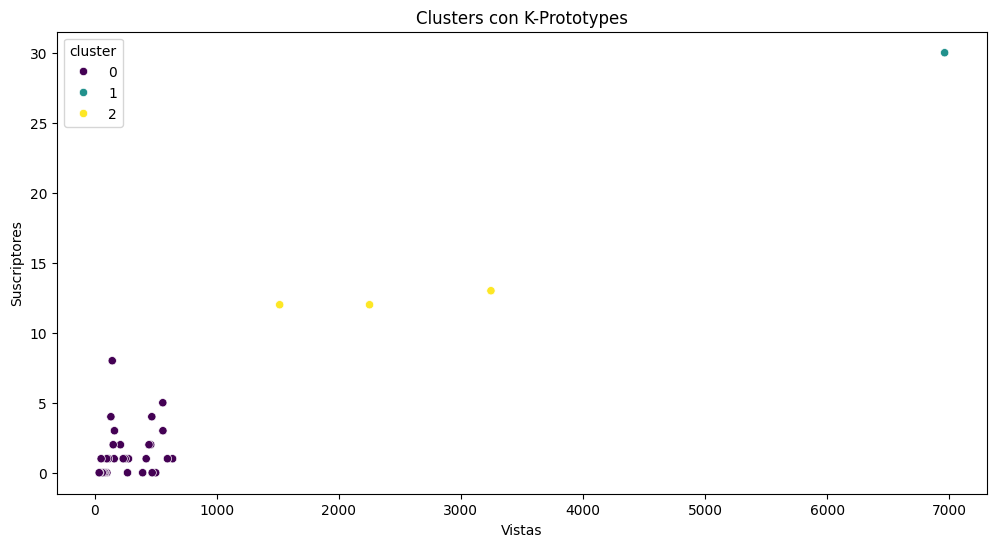

In [129]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Vistas', y='Suscriptores', hue='cluster', palette='viridis')
plt.title('Clusters con K-Prototypes')
plt.show()

In [130]:
silhouette = silhouette_score(df[valores_numéricos], df['cluster'])
calinski_harabasz = calinski_harabasz_score(df[valores_numéricos], df['cluster'])
davies_bouldin = davies_bouldin_score(df[valores_numéricos], df['cluster'])

In [131]:
print(f"Métricas del modelo:")
print(f"- Silueta: {silhouette:.3f}")
print(f"- Calinski-Harabasz: {calinski_harabasz:.3f}")
print(f"- Davies-Bouldin: {davies_bouldin:.3f}")

Métricas del modelo:
- Silueta: 0.828
- Calinski-Harabasz: 892.698
- Davies-Bouldin: 0.321


In [132]:
print("Información de los clusters:")
cluster_counts = df['cluster'].value_counts()

print("\nNúmero de elementos en cada cluster:")
print(cluster_counts)

Información de los clusters:

Número de elementos en cada cluster:
cluster
0    31
2     3
1     1
Name: count, dtype: int64


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Ahora podemos analizar cada cluster por separado, para ver que características tienen y si podemos sacar alguna conclusión de ellos.
</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 0 (31 videos)
</div>

In [133]:
df.loc[df['cluster'] == 0].describe()

,Longitud título,Vistas,Tiempo de reproducción (horas),Suscriptores,Duración Promedio (Seg),Impresiones,Longitud descripción,Descripción sentimiento positivo,Descripción sentimiento objetivo,Duración (segundos),Cantidad de emojis en el título,Cantidad de emojis en las descripción,Cantidad de hashtags en el título,Cantidad de hashtags en la descripción,R,G,B,Mes de publicación,Suscriptores (entre fechas),cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,36.838710,267.032258,3.999642,1.451613,52.612903,3012.225806,589.387097,0.073979,0.875725,184.677419,1.161290,3.709677,1.161290,7.064516,89.516129,90.741935,104.774194,7.548387,3.580645,0.0
std,17.226137,192.368654,5.084263,1.822795,39.114087,4048.887985,438.464645,0.039857,0.057635,147.454261,0.522607,3.195763,0.454369,5.118173,80.303952,69.737588,69.193791,1.312471,4.264381,0.0
min,10.000000,38.000000,0.190800,0.000000,16.000000,235.000000,25.000000,0.000000,0.781977,25.000000,1.000000,1.000000,1.000000,1.000000,9.000000,12.000000,17.000000,5.000000,-1.000000,0.0
25%,27.000000,100.500000,1.460050,0.000000,20.000000,480.000000,159.500000,0.048451,0.839167,46.000000,1.000000,1.000000,1.000000,5.000000,26.000000,34.500000,42.000000,7.000000,0.500000,0.0
50%,34.000000,212.000000,2.506900,1.000000,40.000000,986.000000,615.000000,0.076667,0.875000,199.000000,1.000000,2.000000,1.000000,6.000000,53.000000,63.000000,85.000000,7.000000,2.000000,0.0
75%,47.500000,453.000000,3.983400,2.000000,77.500000,3995.500000,841.500000,0.093915,0.894615,284.500000,1.000000,5.000000,1.000000,8.000000,177.500000,154.500000,160.000000,8.000000,5.500000,0.0
max,71.000000,639.000000,25.614500,8.000000,144.000000,16064.000000,1664.000000,0.177083,1.000000,462.000000,3.000000,11.000000,3.000000,22.000000,238.000000,232.000000,228.000000,10.000000,17.000000,0.0


In [134]:
df.loc[df['cluster'] == 0]

,ID,Título del video,Longitud título,Vistas,Tiempo de reproducción (horas),Suscriptores,Duración Promedio (Seg),Impresiones,Categoría,Descripción,...,Fecha de publicación,Mes de publicación,Cuartiles (Mes),Fecha antes del proximo video,Suscriptores (entre fechas),Celebración cercana,Celebración cercana (agrupado),Países de celebración cercana,Relación con festividad,cluster
4,oTU_xrW4AXI,Would You Rather... Hardest Choices Edition,43,639,25.6145,1,144,16064,Trivia y Cuestionarios Generales,Get ready to put your decision-making skills t...,...,6/9/2024,9,Q3,11/9/2024,1,Labor Day,Labor Day,"US,CA,AU",False,0
5,LeVzouFBmzU,Would you rather… Olympics,26,597,3.9218,1,23,550,Deportes y Juegos,"Go for gold with our Olympic ""Would You Rather...",...,3/8/2024,8,Q3,3/8/2024,2,Summer Olympics Opening Ceremony,Summer Olympics,"US,GB,CA,AU,IN,ZA,NZ,MY,SG,IE,PH,KR,BD,BR,AR,E...",True,0
6,9o2NvXVnNXk,Would You Rather ... 5 Tough Choices! 🤯 #short...,63,560,3.1657,3,20,289,Trivia y Cuestionarios Generales,🔥 Ready to make the hardest choices ever? 🤔 Co...,...,12/9/2024,9,Q3,11/9/2024,0,National Day,National Day,MX,False,0
7,Bt62oT9YD5o,Halloween SPECIAL EDITION Choose one button: Y...,58,559,11.9006,5,76,11458,Festividades y Eventos,Test your courage and choose one button: Yes ✅...,...,31/10/2024,10,Q4,5/11/2024,9,Halloween,Halloween,"US,GB,AU,CA,MX,PH",True,0
8,HINQqOrQfyU,Birds Quiz,10,501,2.8208,0,20,235,Trivia y Cuestionarios Generales,Preview to our Birds Quiz,...,21/9/2024,9,Q3,26/9/2024,1,National Day,National Day,MX,False,0
9,UrQgZlRx5XE,Would you rather... Olympics 2024 Moments #oly...,71,472,2.3085,0,17,611,Deportes y Juegos,"Take a pick in our Olympics ""Would You Rather""...",...,4/8/2024,8,Q3,6/8/2024,0,Summer Olympics Closing Ceremony,Summer Olympics,"US,GB,CA,AU,IN,ZA,NZ,MY,SG,IE,PH,KR,BD,BR,AR,E...",True,0
10,9gmTfQtWPJM,Would You Rather...? 🚀 Space Edition! #Shorts,45,469,3.0233,4,23,487,Ciencia y Espacio,"Blast off with our space-themed ""Would You Rat...",...,21/7/2024,7,Q3,25/7/2024,5,Summer Olympics Opening Ceremony,Summer Olympics,"US,GB,CA,AU,IN,ZA,NZ,MY,SG,IE,PH,KR,BD,BR,AR,E...",False,0
11,wic0IkHb6VE,Euros quiz,10,460,2.6591,2,20,471,Deportes y Juegos,The UEFA European Football Championship is alm...,...,6/7/2024,7,Q3,8/7/2024,10,Euro Cup Final,Euro Cup,"US,GB,CA,AU,IN,ZA,NZ,MY,SG,IE,PH,KR,BD,BR,AR,E...",True,0
12,qve0bhKccpo,Euros Quiz #2,14,446,2.0956,2,16,457,Deportes y Juegos,The UEFA European Football Championship is alm...,...,9/7/2024,7,Q3,9/7/2024,5,Euro Cup Final,Euro Cup,"US,GB,CA,AU,IN,ZA,NZ,MY,SG,IE,PH,KR,BD,BR,AR,E...",True,0
13,wV0mpy-nLUU,Euros 2024 - Spain vs France Semi-final,40,423,1.8886,1,16,537,Deportes y Juegos,Euros 2024 - Spain vs France Semi-final.,...,10/7/2024,7,Q3,9/7/2024,0,Euro Cup Final,Euro Cup,"US,GB,CA,AU,IN,ZA,NZ,MY,SG,IE,PH,KR,BD,BR,AR,E...",True,0


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 0 Descripción (Conclusión):</br>
<p>Título: Los títulos de los videos tienen una longitud promedio de 36.8 caracteres, esto lo que refleja es un estilo de títulos relativamente concisos, con una desviación estándar de 17.2 caracteres donde esto indica que el canal esta usando títulos muy largos de vez en cuando como también muy cortos.</p>

<p>Vistas: El promedio de vistas por video es de 267, pero con una desviación estándar de 192 vistas, lo que implica que algunos videos alcanzan muchas más vistas que otros. Esto significa que algunos contenidos están generando mayor interés y visibilidad, mientras que otros tienen un rendimiento más bajo.</p>

<p>Tiempo de Reproducción: El promedio de 4 horas de tiempo de reproducción por video muestra que los videos tienen un tiempo de visualización razonable, pero hay una gran variabilidad (hasta 25.6 horas en algunos casos), lo que significa que algunos videos tienen un rendimiento mucho mejor en términos de retención de audiencia.</p>

<p>Suscriptores: Los videos contribuyen con un promedio de 1.45 nuevos suscriptores por video. Este valor es bajo ya que, aunque los videos están siendo vistos, no están motivando de manera efectiva la suscripción al canal.</p>

<p>Duración Promedio: La duración promedio de los videos es de 52.6 segundos, lo que significa que los videos son breves. Esto puede ser atractivo para los usuarios que buscan contenido rápido, pero también limita la posibilidad de obtener a la audiencia a largo plazo.</p>

<p>Impresiones: Los videos tienen un promedio de 3012.2 impresiones. Sin embargo, la gran desviación estándar de 4048.9 muestra que algunos videos tienen un alcance significativamente mayor que otros. Esto puede deberse a la variabilidad en la forma en que los videos son mostrados en las búsquedas o las recomendaciones de YouTube.</p>

<p>Uso de Emojis y Hashtags: Los títulos de los videos incluyen en promedio 1.16 emojis y las descripciones contienen 3.71 emojis. Además, los títulos tienen en promedio 1.16 hashtags, mientras que las descripciones tienen 7.06 hashtags. El uso moderado de estos elementos indica que el canal está tratando de atraer la atención de los usuarios sin sobrecargar el contenido lo cual es muy bueno.</p>

<p>Sentimiento en las Descripciones: El sentimiento positivo en las descripciones es de 0.0739, mientras que el sentimiento objetivo es de 0.8757. Esto sugiere que las descripciones tienden a se ligeramente positivas, lo que podría ayudar a mantener una relación amigable con los usuarios.</p>

<p>En conclusión, el cluster #0 los videos sobresalen por su alto desempeño en términos de vistas, tiempo de reproducción y nuevos suscriptores, lo que demuestra que los usuarios están disfrutando del contenido. Además, la estrategia de usar títulos y descripciones concisas, con un uso equilibrado de emojis y hashtags, parece estar dando buenos resultados.</p>

</div>

</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 1 (1 video)
</div>

In [135]:
df.loc[df['cluster'] == 1].describe()

,Longitud título,Vistas,Tiempo de reproducción (horas),Suscriptores,Duración Promedio (Seg),Impresiones,Longitud descripción,Descripción sentimiento positivo,Descripción sentimiento objetivo,Duración (segundos),Cantidad de emojis en el título,Cantidad de emojis en las descripción,Cantidad de hashtags en el título,Cantidad de hashtags en la descripción,R,G,B,Mes de publicación,Suscriptores (entre fechas),cluster
count,1.0,1.0,1.000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,26.0,6961.0,91.856,30.0,47.0,268415.0,1078.0,0.064607,0.894663,200.0,1.0,11.0,1.0,6.0,53.0,186.0,216.0,6.0,2.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,26.0,6961.0,91.856,30.0,47.0,268415.0,1078.0,0.064607,0.894663,200.0,1.0,11.0,1.0,6.0,53.0,186.0,216.0,6.0,2.0,1.0
25%,26.0,6961.0,91.856,30.0,47.0,268415.0,1078.0,0.064607,0.894663,200.0,1.0,11.0,1.0,6.0,53.0,186.0,216.0,6.0,2.0,1.0
50%,26.0,6961.0,91.856,30.0,47.0,268415.0,1078.0,0.064607,0.894663,200.0,1.0,11.0,1.0,6.0,53.0,186.0,216.0,6.0,2.0,1.0
75%,26.0,6961.0,91.856,30.0,47.0,268415.0,1078.0,0.064607,0.894663,200.0,1.0,11.0,1.0,6.0,53.0,186.0,216.0,6.0,2.0,1.0
max,26.0,6961.0,91.856,30.0,47.0,268415.0,1078.0,0.064607,0.894663,200.0,1.0,11.0,1.0,6.0,53.0,186.0,216.0,6.0,2.0,1.0


In [136]:
df.loc[df['cluster'] == 1]

,ID,Título del video,Longitud título,Vistas,Tiempo de reproducción (horas),Suscriptores,Duración Promedio (Seg),Impresiones,Categoría,Descripción,...,Fecha de publicación,Mes de publicación,Cuartiles (Mes),Fecha antes del proximo video,Suscriptores (entre fechas),Celebración cercana,Celebración cercana (agrupado),Países de celebración cercana,Relación con festividad,cluster
0,nvWDAXOJRlE,Olympics Quiz | Facts Quiz,26,6961,91.856,30,47,268415,Deportes y Juegos,Hey Kids! Ready for an Olympic adventure? Welc...,...,21/6/2024,6,Q2,26/6/2024,2,Summer Olympics Opening Ceremony,Summer Olympics,US,True,1


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 1 Descripción (Conclusión):</br>
<p>Título: La longitud del título es de 26 caracteres en promedio. Esto refleja títulos que son breves y concisos, lo que podría estar dirigido a captar rápidamente la atención de los todos los usuarios. Dado que solo un valor, no podemos observar una tendencia en cuanto a títulos más largos o cortos.</p>

<p>Vistas: El promedio de las vistas es de 6961 por video. Asimismo, esto indica un rendimiento sobresaliente para la visibilidad del canal y la popularidad con respecto al video.</p>

<p>Tiempo de Reproducción: Los videos tiene 91.86 horas de tiempo de reproducción. Es un valor alto, lo que significa que los usuarios están dedicando una cantidad de tiempo a ver el los videos.</p>

<p>Suscriptores: El promedio de suscriptores nuevos por video es de 30. Esto significa que los videos están motivando a los espectadores a suscribirse al canal.</p>

<p>Duración Promedio: Los videos tienen un promedio de 47 segundos de duración. Esto significa que el contenido del video es breve y largo para mantener al usuario visualizando todo el video.</p>

<p>Impresiones: El número de impresiones es de 268.415, esto significa que los videos están apareciendo en las búsquedas y recomendaciones del mismo YouTube, donde esto alcanzó una audiencia amplia.</p>

<p>Descripción: La descripción tiene una longitud promedio de 1078 caracteres, Esto significa que los videos tiene unas descripciones detalladas, donde puede ayudar al usuario a comprender lo que está a punto de visualizar.</p>

<p>Uso de Emojis y Hashtags: Los títulos de los videos incluyen un promedio de 1 emoji, mientras que las descripciones contienen 11 emojis. Asimismo, el uso de emojis en la descripción captan la atención de los usuarios. Por otro lado, los títulos tienen un promedio de 1 hashtag, mientras que las descripciones contienen 6 hashtags, lo que ayuda a mejorar la visualización del contenido en las búsquedas relacionadas con esos hashtags.</p>

<p>Sentimiento en las Descripciones: El sentimiento positivo en las descripciones es de 0.0646, mientras que el sentimiento objetivo es de 0.8947. Esto significa que las descripciones tiene un tono ligeramente positivo, lo que podría estar unido con el enfoque del canal de ser amigable con los usuarios pero directos.</p>

<p>En conclusión, este cluster #1 podemos ver que este conjunto de datos representa un rendimiento considerablemente alto en términos de vistas e impresiones, con un promedio de 6961 vistas por video y 268,415 impresiones. La longitud promedio de los títulos es relativamente corta, lo que podría reflejar una tendencia a ser concisos y directos. Sin embargo, el bajo número de nuevos suscriptores nos dice que, aunque los videos atraen a usuarios significativos, no están siendo tan efectivos en convertir vistas en suscripciones. Los videos también tienden a ser de corta duración pero este es un factor positivo para mantener la atención, pero podría limitar la profundidad del contenido. El uso moderado de emojis y hashtags parece estar optimizado, lo que puede estar ayudando a mejorar la visibilidad en las búsquedas y recomendaciones de YouTube. </p>


</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 2 (3 videos)
</div>

In [137]:
df.loc[df['cluster'] == 2].describe()

,Longitud título,Vistas,Tiempo de reproducción (horas),Suscriptores,Duración Promedio (Seg),Impresiones,Longitud descripción,Descripción sentimiento positivo,Descripción sentimiento objetivo,Duración (segundos),Cantidad de emojis en el título,Cantidad de emojis en las descripción,Cantidad de hashtags en el título,Cantidad de hashtags en la descripción,R,G,B,Mes de publicación,Suscriptores (entre fechas),cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.000000,3.00000,3.000000,3.000000,3.0
mean,44.000000,2338.000000,63.873467,12.333333,93.666667,43637.666667,1021.333333,0.079789,0.866305,283.333333,1.0,8.000000,1.0,3.0,145.000000,64.333333,54.00000,8.666667,4.000000,2.0
std,16.822604,868.200438,49.012646,0.577350,45.081408,19678.984332,37.819748,0.007682,0.003931,32.624122,0.0,4.582576,0.0,2.0,97.872366,61.231800,28.79236,0.577350,3.605551,0.0
min,25.000000,1516.000000,27.717500,12.000000,44.000000,32272.000000,999.000000,0.071839,0.863095,264.000000,1.0,3.000000,1.0,1.0,32.000000,27.000000,34.00000,8.000000,0.000000,2.0
25%,37.500000,1884.000000,35.981100,12.000000,74.500000,32276.000000,999.500000,0.076098,0.864113,264.500000,1.0,6.000000,1.0,2.0,116.000000,29.000000,37.50000,8.500000,2.500000,2.0
50%,50.000000,2252.000000,44.244700,12.000000,105.000000,32280.000000,1000.000000,0.080357,0.865132,265.000000,1.0,9.000000,1.0,3.0,200.000000,31.000000,41.00000,9.000000,5.000000,2.0
75%,53.500000,2749.000000,81.951450,12.500000,118.500000,49320.500000,1032.500000,0.083764,0.867911,293.000000,1.0,10.500000,1.0,4.0,201.500000,83.000000,64.00000,9.000000,6.000000,2.0
max,57.000000,3246.000000,119.658200,13.000000,132.000000,66361.000000,1065.000000,0.087171,0.870690,321.000000,1.0,12.000000,1.0,5.0,203.000000,135.000000,87.00000,9.000000,7.000000,2.0


In [138]:
df.loc[df['cluster'] == 2]

,ID,Título del video,Longitud título,Vistas,Tiempo de reproducción (horas),Suscriptores,Duración Promedio (Seg),Impresiones,Categoría,Descripción,...,Fecha de publicación,Mes de publicación,Cuartiles (Mes),Fecha antes del proximo video,Suscriptores (entre fechas),Celebración cercana,Celebración cercana (agrupado),Países de celebración cercana,Relación con festividad,cluster
1,8EWRh-nRfxg,Harry Potter EXPERTS Only! Tricky Questions Ah...,50,3246,119.6582,13,132,66361,"Películas, Series y Fantasía",Think you're a Harry Potter expert? Test your ...,...,12/9/2024,9,Q3,19/9/2024,5,National Day,National Day,MX,False,2
2,G6gSSwpW0XA,The Most Difficult Flag Quiz Ever (Can You Get...,57,2252,27.7175,12,44,32280,Trivia y Cuestionarios Generales,Are you ready to put your knowledge of world f...,...,27/9/2024,9,Q3,2/10/2024,7,National Day,National Day,"CN,SG,HK",False,2
3,KO-I3woc1zA,Harry Potter | Facts Quiz,25,1516,44.2447,12,105,32272,"Películas, Series y Fantasía",The Ultimate Harry Potter Quiz: How Well Do Yo...,...,15/8/2024,8,Q3,15/8/2024,0,Independence Day,Independence Day,IN,False,2


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Cluster 2 Descripción (Conclusión):</br>
<p>Título: La longitud del título tiene un promedio de 44 caracteres, donde esto refleja  utilizar títulos relativamente moderados, que no son ni demasiado cortos ni excesivamente largos.</p>

<p>Vistas: El promedio de las vistas es de un 2338 por video. Esto significa que los videos están alcanzando una audiencia considerable, pero las vistas no tienen la altura que deberían de tener, lo que da a entender que los videos no están siendo virales. 
</p>
<p>Tiempo de Reproducción: Los videos tiene un promedio de 63.87 horas de tiempo de reproducción. Esto significa, que los videos están atrayendo nuevos suscriptores al canal, pero de igual forma el ritmo de este podría mejorar.
</p>
<p>Duración Promedio: Los videos tienen un promedio de 93.67 segundos de duración, donde esta podemos notarla como relativamente corta, que puede ser una estrategia para mantener la atención de la audiencia sin abrumarla. Estos videos cortos, pueden mantener la atención de los usuarios.
</p>
<p>Impresiones: Los videos tienen un promedio de 43,637 de impresiones, lo que se puede visualizar como buen nivel de visualización. Sin embargo, algunos videos están siendo mostrados con mayor frecuencia en las recomendaciones de YouTube que otros.
</p>
<p>Descripción: Las descripciones de los videos tienen una longitud promedio de 1,021.33 caracteres (se considera largo), con un significado de que los del canal están proporcionando explicaciones detalladas a todos sus usuarios mediante la descripción de los videos.
</p>
<p>Sentimiento en las descripciones: El sentimiento positivo es de 0.0798 y el sentimiento objetivo es de 0.8663, lo que indica que las descripciones son casi la mayoría neutrales, es decir que no intentan influir emocionalmente en los usuarios espectadores.
</p>
<p>Uso de emojis y hashtags: Los títulos tienen 1 emoji de promedio, mientras que en las descripciones tienen un promedio de 8 emojis. Al usar emojis moderadamente, ayuda a que el contenido sea mas atractivo visualmente. Por otro lado, los títulos incluyen 1 hashtag y las descripciones 3 hashtags, lo que significa que pueden encontrar los videos del canal mediante esos hashtags en una búsqueda general.</p>

<p>En conclusión, este cluster #2 muestra un rendimiento adecuado en cuanto a vistas, tiempo de reproducción y suscriptores. Los videos tienen un buen nivel de visibilidad, con un número considerable de impresiones, pero la tasa de conversión a suscriptores puede mejorarse. La duración de los videos, de aproximadamente 1.5 minutos, es relativamente corta y puede estar contribuyendo a mantener la atención de los usuarios. </p>

</div>